<a href="https://colab.research.google.com/github/jinsusong/study-paper-review/blob/main/12_Semi_Supervised_Sequence_Modeling_With_Cross_View_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semi-Supervised Sequence Modeling With Cross-View Training (EMNLP)

## Abstract

CVT : labeled + unlabeled data를 사용해 LM의 표현을 향상시키는 semi supervised learing algorithm

CVT : multi-task learning과 결합할 때 특히 효과적

word2vec 및 ELMo와 같은 비지도 표현 학습 알고리즘은 주로 레이블이 없는 많은 텍스트를 이용할 수 있기 때문에 많은 Supervised NLP 모델의 정확도를 향상시킨다.

그러나 Supervised 모델은 기본 교육 단계 동안에만 작업별 레이블링된 데이터로부터 학습한다. 

따라서 레이블링된 데이터와 레이블링되지 않은 데이터를 혼합하여 Bi-LSTM 문장 인코더의 표현을 개선하는 준지도 학습 알고리즘인 CVT(Cross-View Training)를 제안한다. 

라벨링된 examples에서는 standard supervised learning이 사용된다. 

레이블이 없는 examples에서, CVT는 전체 입력을 보는 전체 모델의 예측과 일치하도록 입력의 제한된 보기(예: 문장의 일부만)를 보는 보조 예측 모듈을 가르친다. 

보조 모듈과 전체 모델은 중간 표현을 공유하므로, 이는 차례로 전체 모델을 개선한다. 

또한, 우리는 CVT가 멀티태스킹 학습과 결합할 때 특히 효과적이라는 것을 보여준다. 

우리는 다섯 가지 시퀀스 태그 지정 작업, 기계 번역 및 의존성 구문 분석에 대해 CVT를 평가하여 최첨단 결과를 달성한다.

#Introduction

딥러닝 모델은 많은 양의 labeled data로 훈련했을 때 제일 잘 작동하지만, 라벨을 붙이는데는 돈이 많이 든다.

그래서 unlabeled example을 활용하는 semi-superviesed 학습 기술인 word vector를 훈련하는 방식을 사용함 

기존 연구인 Word2vec + ELMO 를 활용해서 많은 양의 unlabeled text를 활용할 수 있게 되었고 이로인해 supervised NLP Model의 정확도가 향상됨.

주요 단점 : 첫 번째 표현 학습 단계는 라벨링된 데이터의 장점을 얻을 수가 없다. 

아무래도 모델은 특정 작업을 목표로 하는 표현 대신, 일반적으로 효과적인 표현을 학습하기 위해 훈련하기 때문 

self-training 같은 semi-supervised 학습 알고리즘은 labeled + unlabeled 작업에 대해 지속적으로 학습함.

NLP에서도 효과적이나, 보통 neural model에서는 사용을 잘 안한다.

뉴럴 시퀀스 모델에서 잘 작동하는 새로운 self-training 알고리즘 : CVT 

CVT는 기존 self-training이 가지는 고질적인 문제점(student가 이미 모델이 훈련 되고 있는 예측을 만들어냄)을 해결한다. 



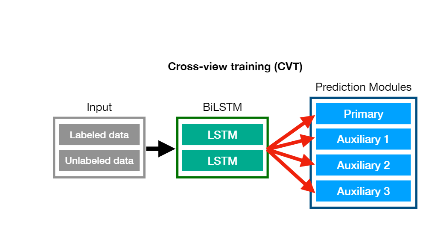

CVT는 이에 대한 해결책으로 , multi-view learning으로부터 영감을 얻어, input의 다른 view들을 걸쳐 일관된 결과를 생성하기 위해 모델을 학습

student로서 전체 모델을 학습하는 방법이 아닌, CVT에 vector표현을 예측으로 바꿔주는 뉴럴 네트워크인 auxiliary prediction modeule을 추가하고, student로서 이들을 훈련시킴.

각 student 예측 모듈의 input은 전체 input의 제한된 뷰에 해당하는 모델의 중간 표현의 하위집합 


## Cross-View Training 



Cross-View Training 

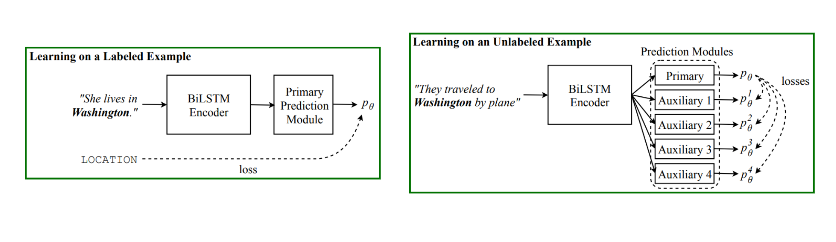

라벨이 붙지 않은 작업

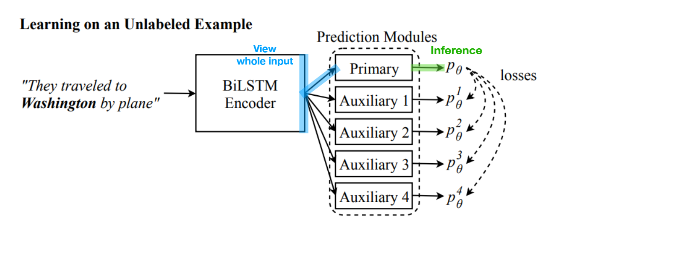

1. inference를 먼저 수행해 soft target을 만든다.

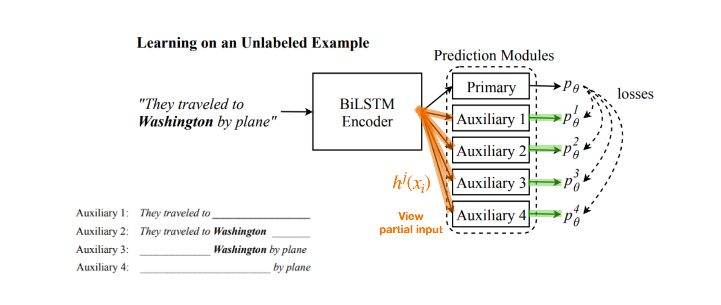

2. Auxiliary prediction module을 사용, 단 훈련할 때만

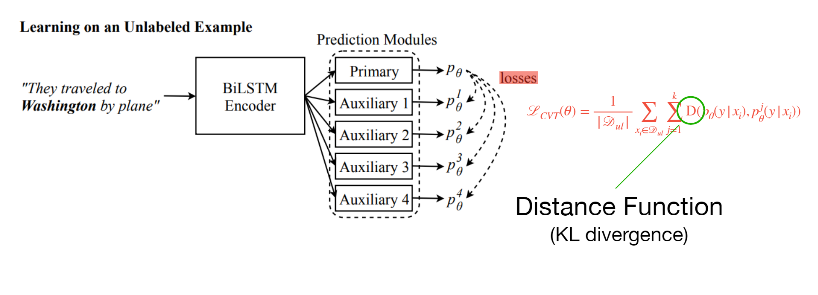

3, Primary모듈과 일치하도록 공동으로(jointly) 훈련 

트레이닝하는 동안 primary module의 prediction은 고정됨

Auxiliary module을 학습 -> 입력으로 받아들이는 표현이 개선되어 모델의 입력 중 일부를 사용할 수 없는 경우에도 예측을 만드는데 유용하다. 

따라서 동일한 공유 표현을 기반으로 구축된 primary prediction module이 개선됨 

최종적인 LOSS : supervised loss와 cvt loss를 total loss로 결합 후 SGD로 최소화함.


대부분의 neural network에서, prediction module 들을 더 추가하는 것은 모델이 표현을 만드는 부분(RNN, CNN) 대비 계산 비용이 싸다.

따라서 앞서 제안한 방법은 대부분의 작업에 대한 다른 self-training 접근 방식에 비해 훈련 시간에 overhead를 거의 주지 않는다 .

CVT는 inference 시간이나 fully-trained 모델의 파라미터 수를 바꾸지 않는다. -> auxiliary prediction module은 훈련할 때만 사용되기 때문 



CVT는 shared BiLSTM encoder 위에 다른 작업에 대한 prediction module을 추가해 multi-task learning과 쉽게 결합할 수 있음.

Supervised learning동안, 랜덤하게 과제를 선택하고 과제에 대한 labeled data의 미니배치를 사용해 L_sup를 업데이트.

Unlabeled data: 한 번에 모든 과제에 걸쳐 L_cvt 공동으로 최적화 -> primary prediction module inderence -> auxiliary prediction module로 예측 정보 학습( 마찬가지로 labeled, unlabeled 번갈아서 수행) 



많은 과제에 걸쳐 labeled된 데이터들은 multi-task 시스템에서 학습하는 데 유용하지만, 대부분의 데이터 셋에는 하나의 작업만 labeling됨.

Multi-task cvt의 장점 : 모델이 unlabeled data로부터 모든 과제에 대한 labeled data를 만들어냄 -> 효율성과 훈련시간 상당히 개선! 


## Cross-View Training Models 

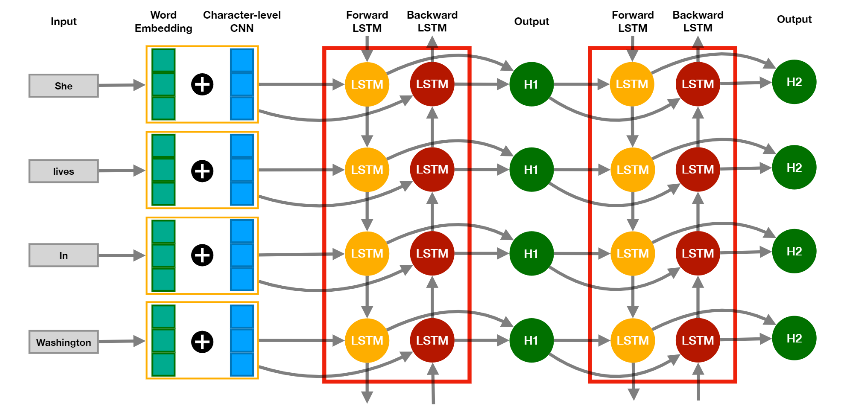

모델은 두개의 CNN , BiLSTM Sentence encdoer를 사용 
1. 단어를 파싱
2. 단어는 임베딩 벡터와 CNN의 아웃풋으로 합쳐져서 표현되고 
3. 벡터들은 Forward LSTM과 Backward LSTM 양쪽으로 들어가는 구조
4. 두번째 LSTM에서는 첫번째 LSTM의 아웃풋을 인풋으로 받는 구조로 이루어짐 



CVT는 학생으로서 전체 모델을 훈련시키는 대신, 보조 예측 모듈(벡터 표현을 예측으로 변환하는 신경 네트워크)을 모델에 추가하고 학생으로서 훈련시킨다. 

각 학생 예측 모듈에 대한 입력은 입력 예제의 제한된 보기에 해당하는 모델의 중간 표현들의 집합이다. 

예를 들어, 시퀀스 태깅을 위한 하나의 보조 예측 모듈은 모델의 첫 번째 BiLSTM 레이어에 있는 "앞으로" LSTM에만 부착되어 있기 때문에 현재 모델의 오른쪽에 있는 토큰을 보지 않고 예측을 한다. 

CVT는 모델의 표현 학습을 개선함으로써 작동합니다. 

보조 예측 모듈은 전체 모델이 입력에 대한 더 나은 무제한 뷰를 가지고 있기 때문에 전체 모델의 예측으로부터 배울 수 있다. 

보조 모듈은 입력에 대한 제한된 보기에도 불구하고 정확한 예측을 하는 방법을 배우면 그 위에 구축된 표현의 품질을 향상시킨다. 따라서 동일한 공유 표현을 사용하는 전체 모델이 개선됩니다. 

간단히 말해서, 우리의 방법은 레이블이 없는 데이터에 대한 표현 학습 아이디어를 고전적인 self-training과 결합한다. 

CVT는 다양한 작업과 신경 구조에 적용할 수 있지만 예측 모듈이 공유 Bi-LSTM 인코더에 연결되는 시퀀스 모델링 작업에 중점을 둔다. 

시퀀스 태거, 그래프 기반 종속성 파서 및 시퀀스 대 시퀀스 모델에 잘 작동하는 보조 예측 모듈을 제안한다. 

영어 의존성 구문 분석, 조합 범주형 문법 슈퍼태깅, 명명된 엔티티 인식, 음성 일부 태그 지정 및 텍스트 청킹과 영어에서 베트남어 기계 번역에 대한 접근 방식을 평가한다. 

CVT는 이러한 모든 작업에 대해 이전에 발표된 결과보다 개선된다. 

또한 CVT는 다중 작업 학습과 쉽고 효과적으로 결합할 수 있다. 

우리는 공유 Bi-LSTM 인코더 위에 다양한 작업에 대한 예측 모듈을 추가하기만 하면 된다. 

기계 번역을 제외한 모든 작업을 공동으로 수행하도록 통합 모델을 훈련하면 총 훈련 시간을 줄이면서 결과(다중 작업 ELMo 모델보다 성능이 우수)가 개선된다.

## Conclustion

준지도 학습을 위한 새로운 방법인 크로스 뷰 훈련을 제안한다. 

우리의 접근 방식을 통해 모델은 레이블이 없는 데이터에 대한 자체 예측을 효과적으로 활용하여 입력 중 일부를 사용할 수 없는 경우에도 정확한 예측을 산출하는 효과적인 표현을 생성하도록 훈련할 수 있다. 

우리는 특히 CVT가 다중 작업 학습과 결합될 때 7개의 NLP 작업에서 우수한 결과를 달성한다.

In [ ]:
출처 : https://www.youtube.com/watch?v=PyripC5Jp_U